# Projeto Kaggle Downloader - Home Credit

Este projeto baixa e extrai os dados da competição do Kaggle:  
[Home Credit - Credit Risk Model Stability](https://www.kaggle.com/competitions/home-credit-credit-risk-model-stability/overview)

## Requisitos

- Python 3.8+
- Instalar dependência: `pip install kaggle`
- Arquivo `kaggle.json` com suas credenciais na mesma pasta do notebook.

## Como usar

1. Acesse https://www.kaggle.com/account
2. Clique em "Create New API Token" → salva `kaggle.json`
3. Coloque o arquivo na pasta do notebook.
4. Execute o notebook: `coletar_dados_kaggle.ipynb`

In [1]:
!pip install -q kaggle


In [ ]:
import os
import json

# Caminho padrão do kaggle.json
CAMINHO_KAGGLE_JSON = os.path.expanduser("~/.kaggle/kaggle.json")

# Verifica se já existe o arquivo de credenciais
if not os.path.exists(CAMINHO_KAGGLE_JSON):
    # Tenta copiar da pasta local
    if os.path.exists("kaggle.json"):
        os.makedirs(os.path.dirname(CAMINHO_KAGGLE_JSON), exist_ok=True)
        with open("kaggle.json", "r") as origem:
            conteudo = json.load(origem)
        with open(CAMINHO_KAGGLE_JSON, "w") as destino:
            json.dump(conteudo, destino)
        os.chmod(CAMINHO_KAGGLE_JSON, 0o600)
        print("Credenciais do Kaggle configuradas com sucesso.")
    else:
        print("Arquivo 'kaggle.json' não encontrado. Coloque-o na mesma pasta deste notebook.")
else:
    print("Credenciais do Kaggle já estão configuradas.")


🔐 Credenciais do Kaggle já estão configuradas.


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os
import zipfile

class ColetorDadosKaggle:
    """
    Classe que baixa e extrai todos os dados de uma competição do Kaggle,
    evitando re-download e validando a competição.
    """
    def __init__(self, nome_competicao: str, pasta_destino: str = "dados") -> None:
        self.nome_competicao = nome_competicao
        self.pasta_destino = pasta_destino
        self.api = KaggleApi()
        self.api.authenticate()

    def baixar_e_extrair_dados(self) -> None:
        try:
            os.makedirs(self.pasta_destino, exist_ok=True)
            zip_path = os.path.join(self.pasta_destino, f"{self.nome_competicao}.zip")

            if os.path.exists(zip_path):
                print("Arquivo ZIP da competição já existe. Pulando download.")
            else:
                print(f"Baixando todos os dados da competição '{self.nome_competicao}'...")
                self.api.competition_download_files(self.nome_competicao, path=self.pasta_destino)
                print("Download concluído!")

            print("Extraindo arquivos ZIP...")
            with zipfile.ZipFile(zip_path, "r") as zip_ref:
                zip_ref.extractall(self.pasta_destino)
            os.remove(zip_path)
            print("Extração finalizada!")

        except Exception as erro:
            print(f"Erro durante o processo: {erro}")
            

class GerenciadorColetaKaggle:
    """
    Classe que gerencia o processo completo de autenticação, download e verificação dos dados.
    Gerenciar todo o processo de ponta a ponta (download + extração + verificação + mensagens ao usuário).
     um orquestrador do processo.
    """

    def __init__(self, nome_competicao: str, pasta_destino: str = "dados"):
        self.nome_competicao = nome_competicao
        self.pasta_destino = pasta_destino
        self.coletor = ColetorDadosKaggle(nome_competicao, pasta_destino)

    def executar(self) -> None:
        """
        Executa o processo completo: download, extração e listagem dos arquivos.
        """
        try:
            self.coletor.baixar_e_extrair_dados()
            print(f"Arquivos disponíveis em: {os.path.abspath(self.pasta_destino)}")

            arquivos = os.listdir(self.pasta_destino)
            if arquivos:
                print(f"{len(arquivos)} arquivos encontrados na pasta '{self.pasta_destino}':")
                for arq in arquivos:
                    print(" -", arq)
            else:
                print("Nenhum arquivo encontrado. Verifique se o download foi bem-sucedido.")

        except Exception as erro:
            print("Não foi possível completar o processo de download e extração.")
            print("Detalhes do erro:", erro)


In [ ]:
# Execução orientada a objetos
gerenciador = GerenciadorColetaKaggle(
    nome_competicao="home-credit-credit-risk-model-stability",
    pasta_destino=".\dados_home_credit"
)

gerenciador.executar()


In [ ]:
#CLASSE PORTÁTIL PARA CONTROLAR AS PASTAS
import os
import pandas as pd

class Config:
    # Pega o diretório raiz do projeto (onde o notebook está rodando)
    PROJECT_ROOT = os.getcwd()

        # Caminho completo até a pasta 'dados_home_credit/csv_files'
    CSV_FILES_PATH = os.path.join(PROJECT_ROOT, "dados_home_credit", "csv_files")

    # Subpastas específicas
    TRAIN_PATH = os.path.join(CSV_FILES_PATH, "train")
    TEST_PATH = os.path.join(CSV_FILES_PATH, "test")
    PROCESSED_PATH = os.path.join(PROJECT_ROOT, "data", "processed")

    # Arquivos de output (exemplo)
    ENRICHED_TRAIN_BASE = os.path.join(PROCESSED_PATH, "train_base_enriched.csv")
    BASE_FINAL = os.path.join(PROCESSED_PATH, "base_final.csv")

    @staticmethod
    def ensure_dirs():
        os.makedirs(Config.PROCESSED_PATH, exist_ok=True)
        
    # Métodos utilitários para uso no notebook
    @staticmethod
    def get_train_file(filename):
        return os.path.join(Config.TRAIN_PATH, filename)

    @staticmethod
    def get_test_file(filename):
        return os.path.join(Config.TEST_PATH, filename)
    
    @staticmethod
    def save_df(df, path, msg="Arquivo salvo em"):
        df.to_csv(path, index=False)
        print(f"{msg} {path}")
        
     #Carrega o dicionario de features com tipo de transformação
    @staticmethod
    def load_feature_definitions():
        path = os.path.join(Config.CSV_FILES_PATH, "feature_definitions.csv")
        df_feature = pd.read_csv(path)
        df_feature = df_feature.copy()  
        df_feature.columns = df_feature.columns.str.lower()
        df_feature['variable'] = df_feature['variable'].str.strip()
        df_feature['tipo_transformacao'] = (
            df_feature['variable'].str.extract(r'([A-Z])$', expand=False).fillna('NA')
        )
        return df_feature


Exploração de Dados (EDA)

ETL das tabelas de profundidade 0

O notebook incluirá:

Carregamento da base principal (train_base.csv)

Merge com tabelas train_static_0_0.csv, train_static_0_1.csv, train_static_cb_0.csv

Análise exploratória inicial:

Tipos de dados

Valores ausentes

Estatísticas básicas

Distribuição do target (target)

Salvamento do dataset limpo (train_base_enriched.csv)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações gerais
pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')

# Verifica e cria pastas
# Garantir que os diretórios existem
Config.ensure_dirs()



CARREGANDO DADOS DE PROFUNDIDADE 0
## Unindo tabelas estáticas à base principal

In [ ]:
arquivos_estaticos = ["train_static_0_0.csv", "train_static_0_1.csv","train_static_cb_0.csv"]

df = pd.read_csv(Config.get_test_file("train_base.csv")) 
#dfx = Config.get_train_file("train_base.csv")
#df = pd.read_csv(dfx, nrows=10000)
print(f"Base inicial carregada: {df.shape}")

antes = df["case_id"].nunique()

for arquivo in arquivos_estaticos:
    df_aux = pd.read_csv(Config.get_train_file(arquivo)) 
    #dfax = Config.get_train_file(arquivo)
    #df_aux = pd.read_csv(dfax, nrows=10000)
    
    df = df.merge(df_aux, on="case_id", how="left")
    
    depois = df["case_id"].nunique()
    if antes != depois:
        print(f"Atenção: Número de case_id mudou após o merge! Antes: {antes}, Depois: {depois}")
    else:
        print("Merge realizado com sucesso. Nenhuma perda de case_id.")
    
print(f"Formato final após merges: {df.shape}")
df.head()


Base inicial carregada: (10000, 5)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4544\709427868.py:13: DtypeWarning: Columns (45,57,84,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(dfax, nrows=10000)


✅ Merge realizado com sucesso. Nenhuma perda de case_id.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4544\709427868.py:13: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(dfax, nrows=10000)


✅ Merge realizado com sucesso. Nenhuma perda de case_id.
✅ Merge realizado com sucesso. Nenhuma perda de case_id.
Formato final após merges: (10000, 391)


,case_id,date_decision,MONTH,WEEK_NUM,target,actualdpdtolerance_344P_x,amtinstpaidbefduel24m_4187115A_x,annuity_780A_x,annuitynextmonth_57A_x,applicationcnt_361L_x,applications30d_658L_x,applicationscnt_1086L_x,applicationscnt_464L_x,applicationscnt_629L_x,applicationscnt_867L_x,avgdbddpdlast24m_3658932P_x,avgdbddpdlast3m_4187120P_x,avgdbdtollast24m_4525197P_x,avgdpdtolclosure24_3658938P_x,avginstallast24m_3658937A_x,avglnamtstart24m_4525187A_x,avgmaxdpdlast9m_3716943P_x,avgoutstandbalancel6m_4187114A_x,avgpmtlast12m_4525200A_x,bankacctype_710L_x,cardtype_51L_x,clientscnt12m_3712952L_x,clientscnt3m_3712950L_x,clientscnt6m_3712949L_x,clientscnt_100L_x,clientscnt_1022L_x,clientscnt_1071L_x,clientscnt_1130L_x,clientscnt_136L_x,clientscnt_157L_x,clientscnt_257L_x,clientscnt_304L_x,clientscnt_360L_x,clientscnt_493L_x,clientscnt_533L_x,clientscnt_887L_x,clientscnt_946L_x,cntincpaycont9m_3716944L_x,cntpmts24_3658933L_x,commnoinclast6m_3546845L_x,credamount_770A_x,credtype_322L_x,currdebt_22A_x,currdebtcredtyperange_828A_x,datefirstoffer_1144D_x,...,assignmentdate_4955616D,birthdate_574D,contractssum_5085716L,dateofbirth_337D,dateofbirth_342D,days120_123L,days180_256L,days30_165L,days360_512L,days90_310L,description_5085714M,education_1103M,education_88M,firstquarter_103L,for3years_128L,for3years_504L,for3years_584L,formonth_118L,formonth_206L,formonth_535L,forquarter_1017L,forquarter_462L,forquarter_634L,fortoday_1092L,forweek_1077L,forweek_528L,forweek_601L,foryear_618L,foryear_818L,foryear_850L,fourthquarter_440L,maritalst_385M,maritalst_893M,numberofqueries_373L,pmtaverage_3A,pmtaverage_4527227A,pmtaverage_4955615A,pmtcount_4527229L,pmtcount_4955617L,pmtcount_693L,pmtscount_423L,pmtssum_45A,requesttype_4525192L,responsedate_1012D,responsedate_4527233D,responsedate_4917613D,riskassesment_302T,riskassesment_940T,secondquarter_766L,thirdquarter_1082L
0,0,2019-01-03,201901,0,0,NaN,NaN,1917.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,30000.0,CAL,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-03,201901,0,0,NaN,NaN,3134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,19999.8,CAL,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-01-04,201901,0,0,NaN,NaN,4937.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,78000.0,CAL,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2019-01-03,201901,0,0,NaN,NaN,4643.6,0.0,0.0,1.0,0.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,40000.0,CAL,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019-01-04,201901,0,1,NaN,NaN,3390.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,44000.0,CAL,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Análise Inicial: Tipos e valores ausentes

In [ ]:
def resumo_nulos(df):
    resumo = df.isnull().mean().sort_values(ascending=False)  # Porc de nulos ordenada decr
    resumo = resumo[resumo > 0].to_frame("porcentagem")        # Filtra colunas com nulos
    resumo["total_nulos"] = df.isnull().sum()                  # Adiciona a contagem absoluta
    resumo = resumo.loc[resumo.index]                          # Garante alinhamento
    resumo.index.name = "coluna"                               # indice
    return resumo.reset_index()                                # Torna coluna uma coluna do df

def tratar_nulos(df, estrategia_numerica='median', estrategia_categorica='missing', criar_flags=True):
    df = df.copy()
    
    for col in df.columns:
        if df[col].isnull().sum() == 0:
            continue  # pula colunas sem nulos
        
        if criar_flags:
            df[f"{col}_was_null"] = df[col].isnull().astype(int)
        
        if df[col].dtype in ['float64', 'int64']:
            if estrategia_numerica == 'mean':
                df[col] = df[col].fillna(df[col].mean())
            elif estrategia_numerica == 'median':
                df[col] = df[col].fillna(df[col].median())
            elif estrategia_numerica == 'zero':
                df[col] = df[col].fillna(0)
            else:
                df[col] = df[col].fillna(-999)
        
        else:  # categórica
            if estrategia_categorica == 'missing':
                df[col] = df[col].fillna('missing')
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

def remover_colunas_com_muitos_nulos(df, limite=0.9):
    porcentagens = df.isnull().mean()
    colunas_a_remover = porcentagens[porcentagens > limite].index
    print(f"Removendo {len(colunas_a_remover)} colunas com mais de {limite*100}% de nulos.")
    return df.drop(columns=colunas_a_remover)

In [ ]:
#Visualizar os nulos
resumo_nulos(df)

#Remover colunas com nulos demais
df = remover_colunas_com_muitos_nulos(df, limite=0.95)

#Tratar os demais
df = tratar_nulos(df, estrategia_numerica='median', estrategia_categorica='missing')
display(df)

## Estatísticas básicas e distribuição do target

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4544\1643190644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df, palette='viridis')


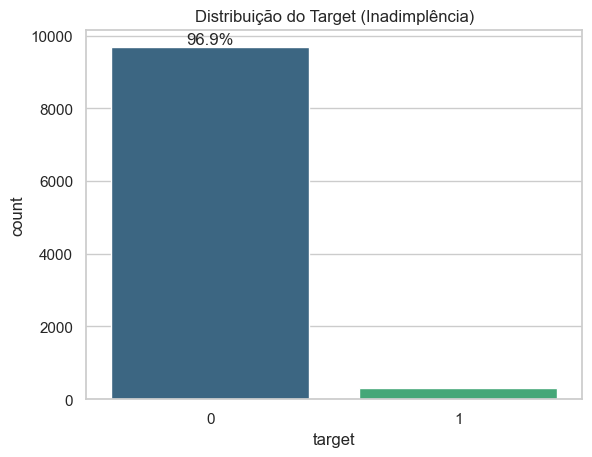

In [ ]:
import seaborn as sns

if "target" in df.columns:
    ax = sns.countplot(x='target', data=df, palette='viridis')
    plt.title("Distribuição do Target (Inadimplência)")

    # Adiciona rtulos com perc
    total = len(df)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom')
        plt.show()
else:
    print("Target não está presente no dataset atual.")



Estatísticas descritivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
case_id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
MONTH,10000.0,201902.0061,0.833986,201901.0,201901.00,201902.0,201903.00,201904.0
WEEK_NUM,10000.0,6.1586,3.624798,0.0,3.00,6.0,9.00,13.0
target,10000.0,0.0313,0.174136,0.0,0.00,0.0,0.00,1.0
actualdpdtolerance_344P_x,10000.0,0.0015,0.150000,0.0,0.00,0.0,0.00,15.0
...,...,...,...,...,...,...,...,...
pmtscount_423L_was_null,10000.0,0.3927,0.488375,0.0,0.00,0.0,1.00,1.0
pmtssum_45A_was_null,10000.0,0.3927,0.488375,0.0,0.00,0.0,1.00,1.0
responsedate_1012D_was_null,10000.0,0.0639,0.244587,0.0,0.00,0.0,0.00,1.0
secondquarter_766L_was_null,10000.0,0.3491,0.476709,0.0,0.00,0.0,1.00,1.0



Distribuição target:


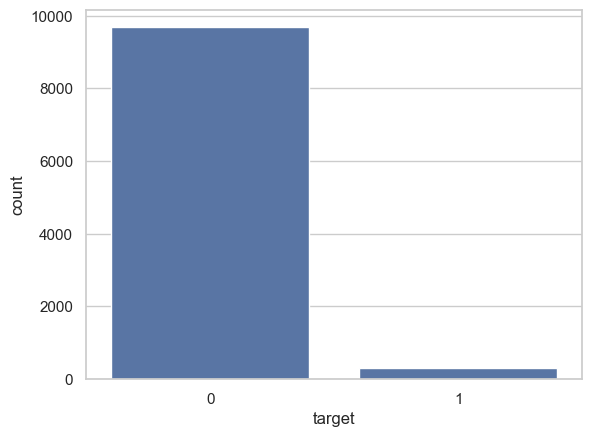

Colunas com nulos acima de 90% serão removidas
Removidas 0 colunas


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4544\3755526827.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df['ano_decisao'] = self.df['date_decision'].dt.year
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4544\3755526827.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.df['mes_decisao'] = self.df['date_decision'].dt.month
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4544\3755526827.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

Score adicionado ao DataFrame.
📈 ROC AUC: 0.6327

📋 Relatório de Classificação:


c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2422
         1.0       0.00      0.00      0.00        78

    accuracy                           0.97      2500
   macro avg       0.48      0.50      0.49      2500
weighted avg       0.94      0.97      0.95      2500


✅ Pipeline executado com sucesso!


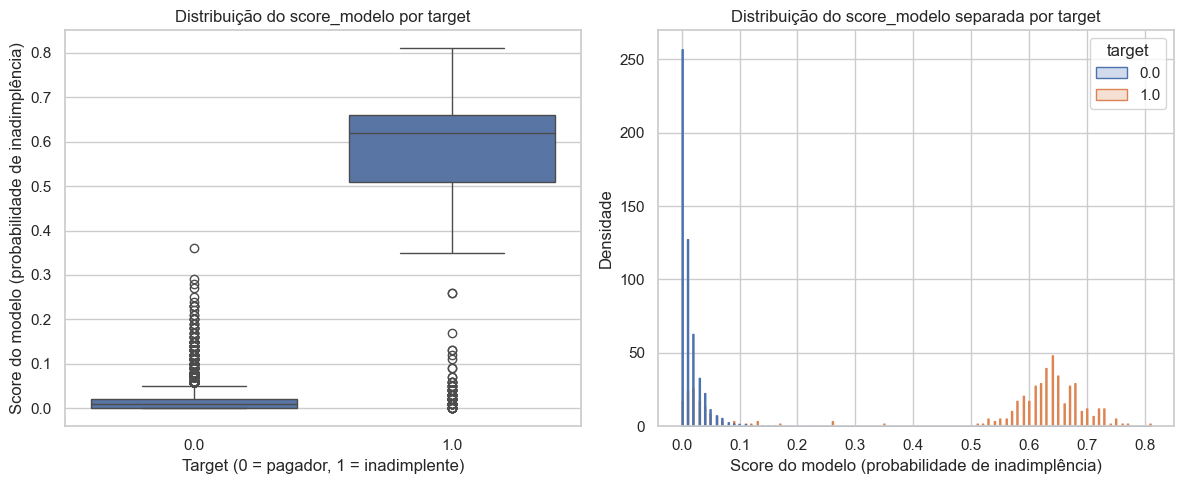

Arquivo salvo em c:\Projetos\home_credit\data\processed\train_base_enriched.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.impute import SimpleImputer


class CreditRiskPipeline:
    def __init__(self, df):
        self.df = df.copy()
        self.model = None
        self.X_train = None
        self.X_val = None
        self.y_train = None
        self.y_val = None
        self.X_train_encoded = None
        self.X_val_encoded = None

    def eda(self):
        print("Estatísticas descritivas (numéricas):")
        display(self.df.describe().T)
        print("\nDistribuição target:")
        sns.countplot(x='target', data=self.df)
        plt.show()

    def tratar_nulos(self, limite=0.9):
        nulos = self.df.isnull().mean()
        print(f"Colunas com nulos acima de {limite*100:.0f}% serão removidas")
        cols_para_remover = nulos[nulos > limite].index.tolist()
        self.df.drop(columns=cols_para_remover, inplace=True)
        print(f"Removidas {len(cols_para_remover)} colunas")

        imputer = SimpleImputer(strategy='mean')
        num_cols = self.df.select_dtypes(include=[np.number]).columns
        self.df[num_cols] = imputer.fit_transform(self.df[num_cols])

    def feature_engineering(self):
        self.df['date_decision'] = pd.to_datetime(self.df['date_decision'], errors='coerce')
        self.df['ano_decisao'] = self.df['date_decision'].dt.year
        self.df['mes_decisao'] = self.df['date_decision'].dt.month
        self.df['dia_decisao'] = self.df['date_decision'].dt.day
        self.df['dia_semana_decisao'] = self.df['date_decision'].dt.weekday
        self.df.drop(columns=['date_decision'], inplace=True)

    def prepara_para_modelo(self, X_train, X_val):
        X_train_encoded = pd.get_dummies(X_train)
        X_val_encoded = pd.get_dummies(X_val)
        X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='left', axis=1, fill_value=0)
        return X_train_encoded, X_val_encoded

    def split_data(self, test_size=0.25, random_state=42):
        X = self.df.drop(['target', 'case_id'], axis=1, errors='ignore')
        y = self.df['target']
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y)

    def train_model(self):
        self.X_train_encoded, self.X_val_encoded = self.prepara_para_modelo(self.X_train, self.X_val)
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.model.fit(self.X_train_encoded, self.y_train)

    def adicionar_score(self):
        #Prepara dados codificados completos alinhados com treino
        X = self.df.drop(['target', 'case_id'], axis=1, errors='ignore')
        X_encoded = pd.get_dummies(X)
        X_encoded = X_encoded.reindex(columns=self.X_train_encoded.columns, fill_value=0)

        # Gera score probabilidade da classe positiva
        scores = self.model.predict_proba(X_encoded)[:, 1]

        #Adiciona coluna ao DataFrame
        self.df['score_modelo'] = scores

        print("Score adicionado ao DataFrame.")

    def evaluate_model(self):
        y_pred_proba = self.model.predict_proba(self.X_val_encoded)[:, 1]
        print(f"ROC AUC: {roc_auc_score(self.y_val, y_pred_proba):.4f}\n")
        print("Relatório de Classificação:")
        print(classification_report(self.y_val, self.model.predict(self.X_val_encoded)))

    def estabilidade_temporal(self):
        if 'MONTH' not in self.df.columns:
            print("Coluna 'MONTH' não encontrada para análise temporal.")
            return

        self.df['MONTH'] = self.df['MONTH'].astype(str)
        colunas_numericas = self.df.select_dtypes(include=['number']).columns.tolist()
        colunas_numericas = [c for c in colunas_numericas if c not in ['target', 'case_id']]

        if not colunas_numericas:
            print("Nenhuma variável numérica encontrada para análise temporal.")
            return

        for feature in colunas_numericas:
            if self.df[feature].notna().sum() > 0:
                try:
                    temp = self.df.groupby('MONTH')[feature].mean()
                    temp.plot(title=f"Estabilidade temporal da variável '{feature}'")
                    plt.xlabel("Mês")
                    plt.ylabel("Média da variável")
                    plt.grid(True)
                    plt.show()
                except Exception as e:
                    print(f"Erro ao processar '{feature}': {e}")
                    
                    
    def plot_score_vs_target(self):
        import seaborn as sns
        import matplotlib.pyplot as plt

        if 'score_modelo' not in self.df.columns:
            print("Coluna 'score_modelo' não encontrada. Execute 'adicionar_score()' antes.")
            return
        if 'target' not in self.df.columns:
            print("Coluna 'target' não encontrada no DataFrame.")
            return

        plt.figure(figsize=(12,5))

        
        plt.subplot(1, 2, 1)
        sns.boxplot(x='target', y='score_modelo', data=self.df)
        plt.title("Distribuição do score_modelo por target")
        plt.xlabel("Target (0 = pagador, 1 = inadimplente)")
        plt.ylabel("Score do modelo (probabilidade de inadimplência)")

        # Histoga com densidade
        plt.subplot(1, 2, 2)
        sns.histplot(data=self.df, x='score_modelo', hue='target', element='step', stat='density', common_norm=False)
        plt.title("Distribuição do score_modelo separada por target")
        plt.xlabel("Score do modelo (probabilidade de inadimplência)")
        plt.ylabel("Densidade")

        plt.tight_layout()
        plt.show()
    
    def salvar_resultado(self, path=None):
        # Garante que as pastas existam
        Config.ensure_dirs()
        
        save_path = path if path is not None else Config.ENRICHED_TRAIN_BASE
        
        # Salva o DataFrame com o score
        self.df.to_csv(save_path, index=False)
        print(f"Arquivo salvo em {save_path}")

    def run(self):
        self.eda()
        self.tratar_nulos()
        self.feature_engineering()
        self.split_data()
        self.train_model()
        self.adicionar_score()  
        self.evaluate_model()
        self.estabilidade_temporal()
        print("\nPipeline executado com sucesso!")



# df_base = pd.read_csv(Config.get_test_file("train_base.csv")) 
df_base = df

pipeline = CreditRiskPipeline(df_base)
pipeline.run()
pipeline.plot_score_vs_target()
pipeline.salvar_resultado() 


## Salvando base enriquecida

carregar todas as tabelas do treino (profundidade 1 e 2)

agregar cada tabela (depth=1 e depth=2) automaticamente

juntar todas as agregações na base principal (train_base)

preparar uma base única para modelagem



In [ ]:
import os
import gc
import pandas as pd

class HomeCreditDataLoader:
    def __init__(self, base_path):
        self.base_path = base_path
        self.train_path = os.path.join(base_path, "train")  
        self.train_base = None
        self.depth1_dfs = {}
        self.depth2_dfs = {}

    def load_train_base(self, enriched=True):
        if enriched:
            path = os.path.join(self.base_path, "train_base_enriched.csv")  
            label = "train_base_enriched"
        else:
            path = os.path.join(self.train_path, "train_base.csv")
            label = "train_base"
            
        self.train_base = pd.read_csv(path)
        print(f" {label} carregado: {self.train_base.shape}")
        return self.train_base

    def load_depth1_tables(self):
        depth1_files = [
            "train_person_1.csv",
            "train_credit_bureau_a_1_0.csv",
            "train_credit_bureau_a_1_1.csv",
            "train_credit_bureau_a_1_2.csv",
            "train_credit_bureau_a_1_3.csv",
            "train_credit_bureau_b_1.csv",
            "train_applprev_1_0.csv",
            "train_applprev_1_1.csv",
            "train_other_1.csv",
            "train_tax_registry_a_1.csv",
            "train_tax_registry_b_1.csv",
            "train_tax_registry_c_1.csv",
            "train_deposit_1.csv",
            "train_person_1.csv",
            "train_debitcard_1.csv"
        ]
        for f in depth1_files:
            try:
                df = pd.read_csv(os.path.join(Config.get_test_file(f))) 
                #df = pd.read_csv(Config.get_train_file(f), nrows=10000)
                self.depth1_dfs[f] = df
                print(f"Loaded depth1: {f} shape {df.shape}")
            except FileNotFoundError:
                print(f"File not found: {f}")

    def load_depth2_tables(self):
        depth2_files = [f"train_credit_bureau_a_2_{i}.csv" for i in range(12)]
        depth2_files.extend([
            "train_credit_bureau_b_2.csv",
            "train_applprev_2.csv",
            "train_person_2.csv"
        ])
        for f in depth2_files:
            try:
                df = pd.read_csv(os.path.join(Config.get_test_file(f))) 
                #df = pd.read_csv(Config.get_train_file(f), nrows=10000)
                self.depth2_dfs[f] = df
                print(f"Loaded depth2: {f} shape {df.shape}")
            except FileNotFoundError:
                print(f"File not found: {f}")

    def aggregate_features(self, df, df_def, origem_nome, depth_level):
        if df.empty or 'case_id' not in df.columns:
            print(f" {origem_nome}: tabela vazia ou sem case_id, pulando agregação.")
            return pd.DataFrame()

        excluidas = ['case_id', 'num_group1', 'num_group2']
        num_cols = df.select_dtypes(include='number').columns.tolist()
        num_cols = [c for c in num_cols if c not in excluidas]
        valid_cols = [col for col in num_cols if col in df_def['variable'].values]

        if not valid_cols:
            print(f" {origem_nome}: sem colunas válidas para agregar.")
            return pd.DataFrame()

        #agregar por grupo
        def agg_por_grupo(df_sub, sufixo):
            if df_sub.empty or 'case_id' not in df_sub.columns:
                print(f" {origem_nome} grupo {sufixo}: DataFrame vazio ou sem case_id, pulando agregação.")
                return pd.DataFrame()
            agg = df_sub.groupby('case_id')[valid_cols].agg(['mean', 'max'])
            agg.columns = [f"{col[0]}__{col[1]}__{sufixo}" for col in agg.columns]
            agg.reset_index(inplace=True)
            return agg

        if depth_level == 0:
            #depth 0, agregação direta
            df_agg = agg_por_grupo(df, origem_nome)
        else:
            # depth > 0, separar grupos
            if 'num_group1' in df.columns:
                df_grp0 = df[df['num_group1'] == 0]
                df_grpN = df[df['num_group1'] > 0]
            elif 'num_group2' in df.columns:
                df_grp0 = df[df['num_group2'] == 0]
                df_grpN = df[df['num_group2'] > 0]
            else:
                df_grp0 = df
                df_grpN = pd.DataFrame()

            agg_grp0 = agg_por_grupo(df_grp0, 'grp0')
            agg_grpN = agg_por_grupo(df_grpN, 'grpN')

            if agg_grp0.empty and agg_grpN.empty:
                print(f" {origem_nome}: ambos grupos vazios, retornando vazio.")
                return pd.DataFrame()
            elif agg_grp0.empty:
                df_agg = agg_grpN
            elif agg_grpN.empty:
                df_agg = agg_grp0
            else:
                
                df_agg = pd.merge(agg_grp0, agg_grpN, on='case_id', how='outer')

            # Renomear colunas para evitar conflito, exceto 'case_id'
            df_agg.rename(columns={col: f"{col}__{origem_nome}" for col in df_agg.columns if col != 'case_id'}, inplace=True)

        return df_agg



    def aggregate_all(self):
        df_def = Config.load_feature_definitions()
        depth1_agg = {}
        depth2_agg = {}

        for nome, df in self.depth1_dfs.items():
            if 'case_id' not in df.columns:
                print(f" {nome}: não possui coluna 'case_id', pulando agregação.")
                continue
            print(f"Agregando {nome} (depth=1)")
            agg_df = self.aggregate_features(df, df_def, origem_nome=nome, depth_level=1)
            if not agg_df.empty:
                depth1_agg[nome] = agg_df

        for nome, df in self.depth2_dfs.items():
            if 'case_id' not in df.columns:
                print(f" {nome}: não possui coluna 'case_id', pulando agregação.")
                continue
            print(f"Agregando {nome} (depth=2)")
            agg_df = self.aggregate_features(df, df_def, origem_nome=nome, depth_level=2)
            if not agg_df.empty:
                depth2_agg[nome] = agg_df

        print("Agregações concluídas.")
        return depth1_agg, depth2_agg
    

    def merge_all(self, depth1_agg, depth2_agg):
        df = self.train_base.copy()

        def preparar_para_merge(df_agg):
            if df_agg.empty:
                return None
            
            df_agg = df_agg.copy()
            
            # remove >90% nulos
            df_agg = df_agg.loc[:, df_agg.isnull().mean() < 0.9].copy()
            # Converter floats para float32 para economizar memoria
            float_cols = df_agg.select_dtypes(include=['float64', 'float32']).columns
            df_agg[float_cols] = df_agg[float_cols].astype('float32')
            return df_agg

        for origem, df_agg in depth1_agg.items():
            print(f"🔗 Merge com {origem} (depth=1)")
            df_agg_preparado = preparar_para_merge(df_agg)
            if df_agg_preparado is not None:
                df = df.merge(df_agg_preparado, on='case_id', how='left')
                gc.collect()

        for origem, df_agg in depth2_agg.items():
            print(f"🔗 Merge com {origem} (depth=2)")
            df_agg_preparado = preparar_para_merge(df_agg)
            if df_agg_preparado is not None:
                df = df.merge(df_agg_preparado, on='case_id', how='left')
                gc.collect()

        print("Merge finalizado com sucesso.")
        return df


In [ ]:

def executar_etl_home_credit():
    print("Iniciando processo ETL do Home Credit...")

    #dir de output existem
    Config.ensure_dirs()

    loader = HomeCreditDataLoader(Config.PROCESSED_PATH)

    loader.load_train_base()
    loader.load_depth1_tables()
    loader.load_depth2_tables()

    depth1_agg, depth2_agg = loader.aggregate_all()

    df_final = loader.merge_all(depth1_agg, depth2_agg)

    Config.save_df(df_final, Config.BASE_FINAL, msg="ETL finalizado com sucesso. Base salva em")

executar_etl_home_credit()



🔍 Iniciando processo ETL do Home Credit...
✅ train_base_enriched carregado: (10000, 178)
Loaded depth1: train_person_1.csv shape (10000, 37)
Loaded depth1: train_credit_bureau_a_1_0.csv shape (10000, 79)
Loaded depth1: train_credit_bureau_a_1_1.csv shape (10000, 79)
Loaded depth1: train_credit_bureau_a_1_2.csv shape (10000, 79)
Loaded depth1: train_credit_bureau_a_1_3.csv shape (10000, 79)
Loaded depth1: train_credit_bureau_b_1.csv shape (10000, 45)
Loaded depth1: train_applprev_1_0.csv shape (10000, 41)
Loaded depth1: train_applprev_1_1.csv shape (10000, 41)
Loaded depth1: train_other_1.csv shape (10000, 7)
Loaded depth1: train_tax_registry_a_1.csv shape (10000, 5)
Loaded depth1: train_tax_registry_b_1.csv shape (10000, 5)
Loaded depth1: train_tax_registry_c_1.csv shape (10000, 5)
Loaded depth1: train_deposit_1.csv shape (10000, 5)
Loaded depth1: train_person_1.csv shape (10000, 37)
Loaded depth1: train_debitcard_1.csv shape (10000, 6)
Loaded depth2: train_credit_bureau_a_2_0.csv shap

Base carregada com shape: (10000, 1444)


,case_id,MONTH,WEEK_NUM,target,actualdpdtolerance_344P_x,annuity_780A_x,annuitynextmonth_57A_x,applicationcnt_361L_x,applications30d_658L_x,applicationscnt_1086L_x,applicationscnt_464L_x,applicationscnt_629L_x,applicationscnt_867L_x,bankacctype_710L_x,cardtype_51L_x,clientscnt12m_3712952L_x,clientscnt3m_3712950L_x,clientscnt6m_3712949L_x,clientscnt_100L_x,clientscnt_1022L_x,clientscnt_1071L_x,clientscnt_1130L_x,clientscnt_157L_x,clientscnt_257L_x,clientscnt_304L_x,clientscnt_360L_x,clientscnt_493L_x,clientscnt_533L_x,clientscnt_887L_x,clientscnt_946L_x,commnoinclast6m_3546845L_x,credamount_770A_x,credtype_322L_x,currdebt_22A_x,currdebtcredtyperange_828A_x,deferredmnthsnum_166L_x,disbursedcredamount_1113A_x,disbursementtype_67L_x,downpmt_116A_x,eir_270L_x,equalitydataagreement_891L_x,homephncnt_628L_x,inittransactionamount_650A_x,inittransactioncode_186L_x,interestrate_311L_x,interestrategrace_34L_x,isbidproduct_1095L_x,isdebitcard_729L_x,lastapplicationdate_877D_x,lastapprcommoditycat_1041M_x,...,pmts_year_507T__mean__grpN__train_credit_bureau_a_2_9.csv,pmts_year_507T__max__grpN__train_credit_bureau_a_2_9.csv,collater_valueofguarantee_1124L__mean__grp0__train_credit_bureau_a_2_10.csv,collater_valueofguarantee_1124L__max__grp0__train_credit_bureau_a_2_10.csv,collater_valueofguarantee_876L__mean__grp0__train_credit_bureau_a_2_10.csv,collater_valueofguarantee_876L__max__grp0__train_credit_bureau_a_2_10.csv,pmts_dpd_1073P__mean__grp0__train_credit_bureau_a_2_10.csv,pmts_dpd_1073P__max__grp0__train_credit_bureau_a_2_10.csv,pmts_dpd_303P__mean__grp0__train_credit_bureau_a_2_10.csv,pmts_dpd_303P__max__grp0__train_credit_bureau_a_2_10.csv,pmts_month_158T__mean__grp0__train_credit_bureau_a_2_10.csv,pmts_month_158T__max__grp0__train_credit_bureau_a_2_10.csv,pmts_month_706T__mean__grp0__train_credit_bureau_a_2_10.csv,pmts_month_706T__max__grp0__train_credit_bureau_a_2_10.csv,pmts_overdue_1140A__mean__grp0__train_credit_bureau_a_2_10.csv,pmts_overdue_1140A__max__grp0__train_credit_bureau_a_2_10.csv,pmts_overdue_1152A__mean__grp0__train_credit_bureau_a_2_10.csv,pmts_overdue_1152A__max__grp0__train_credit_bureau_a_2_10.csv,pmts_year_1139T__mean__grp0__train_credit_bureau_a_2_10.csv,pmts_year_1139T__max__grp0__train_credit_bureau_a_2_10.csv,pmts_year_507T__mean__grp0__train_credit_bureau_a_2_10.csv,pmts_year_507T__max__grp0__train_credit_bureau_a_2_10.csv,collater_valueofguarantee_1124L__mean__grpN__train_credit_bureau_a_2_10.csv,collater_valueofguarantee_1124L__max__grpN__train_credit_bureau_a_2_10.csv,collater_valueofguarantee_876L__mean__grpN__train_credit_bureau_a_2_10.csv,collater_valueofguarantee_876L__max__grpN__train_credit_bureau_a_2_10.csv,pmts_dpd_1073P__mean__grpN__train_credit_bureau_a_2_10.csv,pmts_dpd_1073P__max__grpN__train_credit_bureau_a_2_10.csv,pmts_dpd_303P__mean__grpN__train_credit_bureau_a_2_10.csv,pmts_dpd_303P__max__grpN__train_credit_bureau_a_2_10.csv,pmts_month_158T__mean__grpN__train_credit_bureau_a_2_10.csv,pmts_month_158T__max__grpN__train_credit_bureau_a_2_10.csv,pmts_month_706T__mean__grpN__train_credit_bureau_a_2_10.csv,pmts_month_706T__max__grpN__train_credit_bureau_a_2_10.csv,pmts_overdue_1140A__mean__grpN__train_credit_bureau_a_2_10.csv,pmts_overdue_1140A__max__grpN__train_credit_bureau_a_2_10.csv,pmts_overdue_1152A__mean__grpN__train_credit_bureau_a_2_10.csv,pmts_overdue_1152A__max__grpN__train_credit_bureau_a_2_10.csv,pmts_year_1139T__mean__grpN__train_credit_bureau_a_2_10.csv,pmts_year_1139T__max__grpN__train_credit_bureau_a_2_10.csv,pmts_year_507T__mean__grpN__train_credit_bureau_a_2_10.csv,pmts_year_507T__max__grpN__train_credit_bureau_a_2_10.csv,pmts_dpdvalue_108P__mean__grp0__train_credit_bureau_b_2.csv,pmts_dpdvalue_108P__max__grp0__train_credit_bureau_b_2.csv,pmts_pmtsoverdue_635A__mean__grp0__train_credit_bureau_b_2.csv,pmts_pmtsoverdue_635A__max__grp0__train_credit_bureau_b_2.csv,pmts_dpdvalue_108P__mean__grpN__train_credit_bureau_b_2.csv,pmts_dpdvalue_108P__max__grpN__train_credit_bureau_b_2.cs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1444 entries, case_id to pmts_pmtsoverdue_635A__max__grpN__train_credit_bureau_b_2.csv
dtypes: bool(1), float64(1407), int64(4), object(32)
memory usage: 110.1+ MB


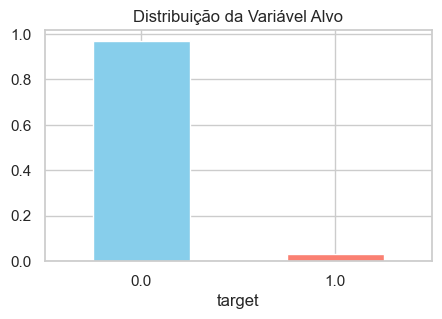

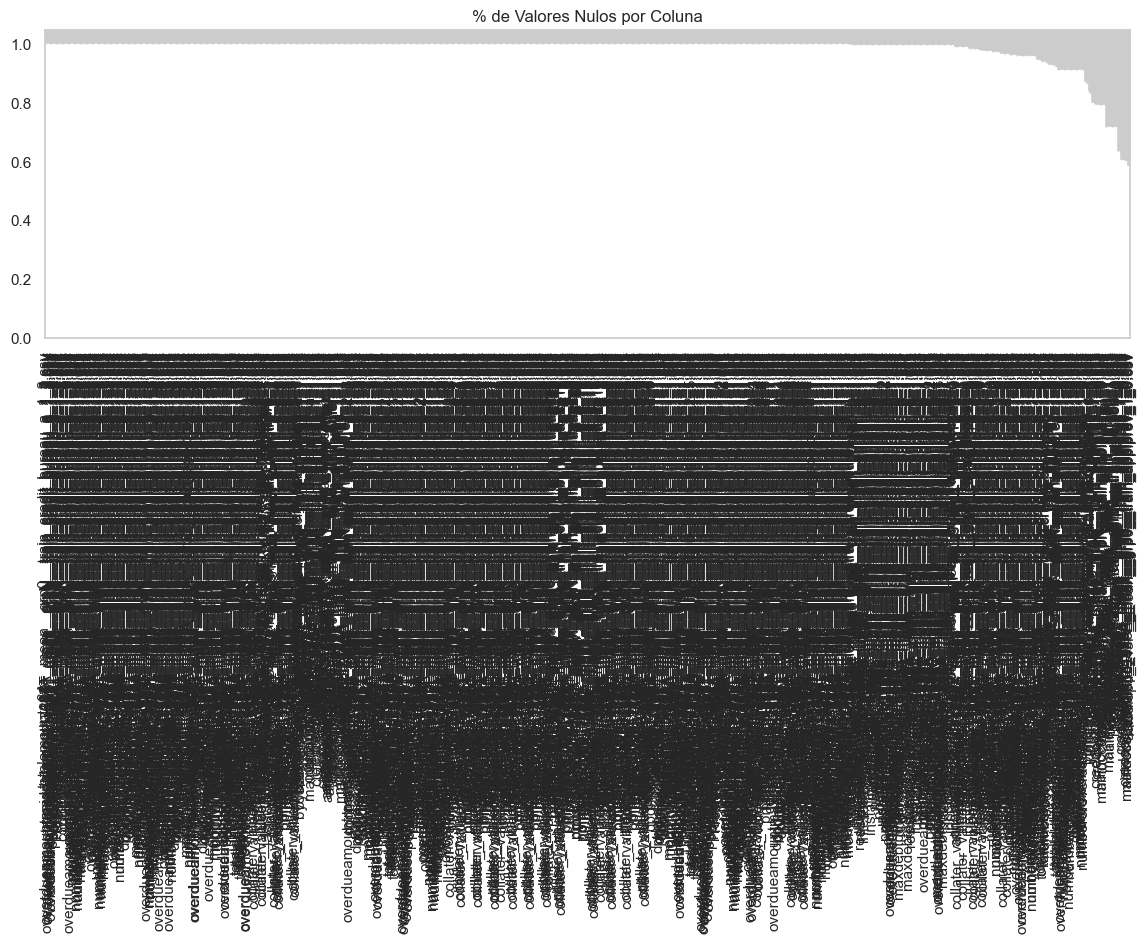

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


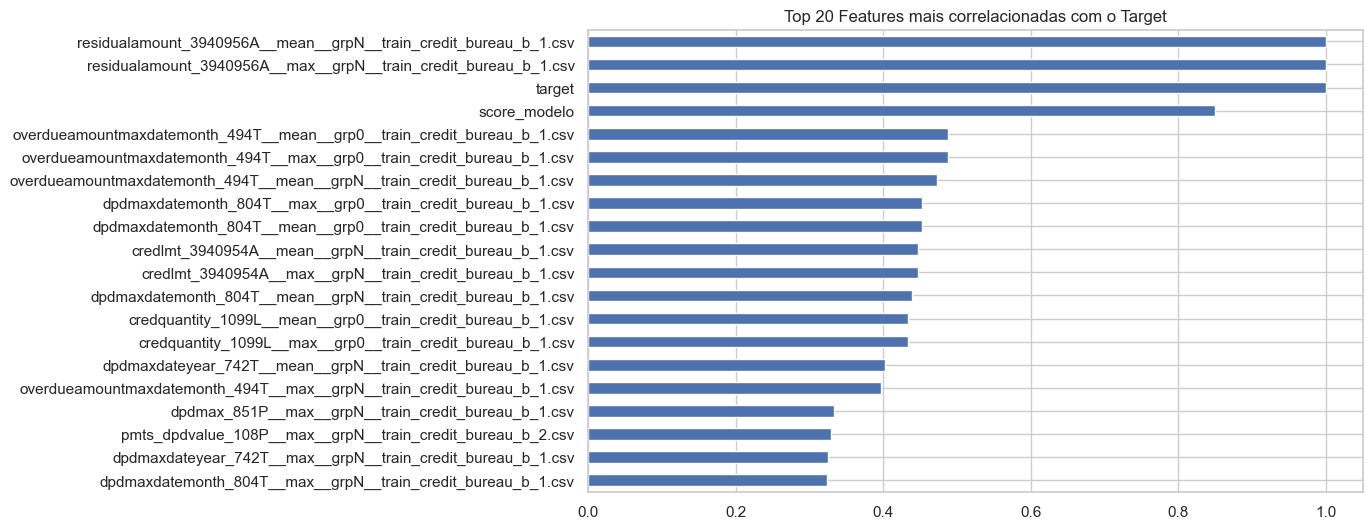

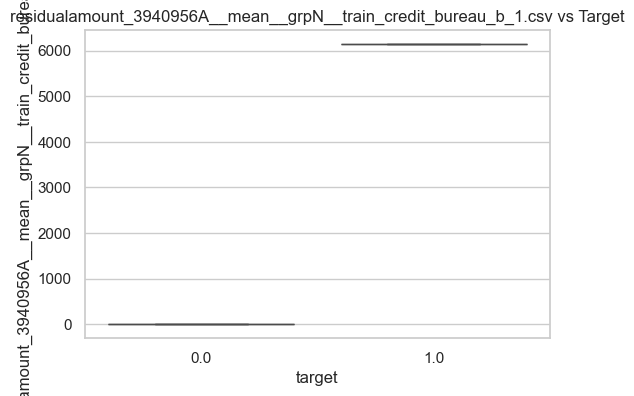

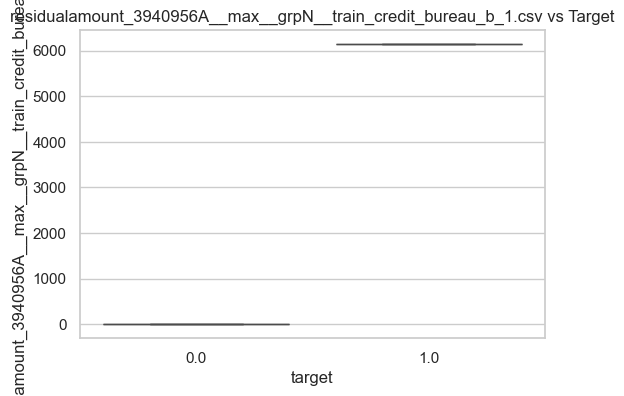

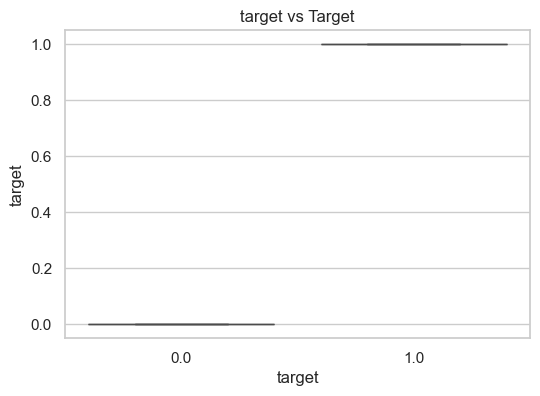

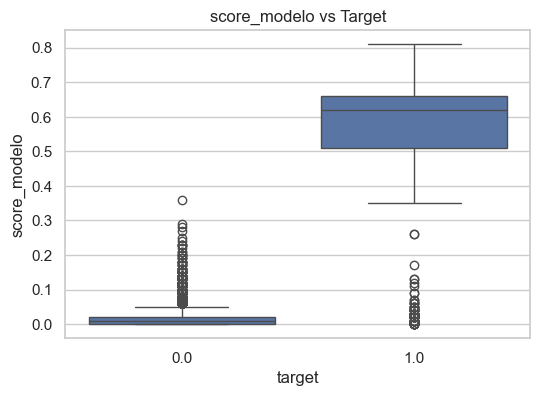

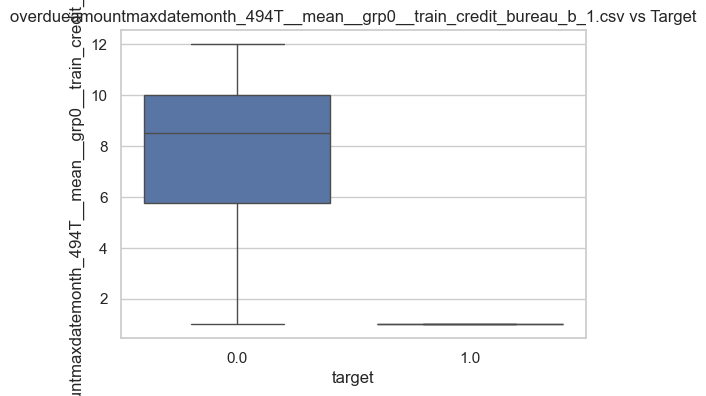

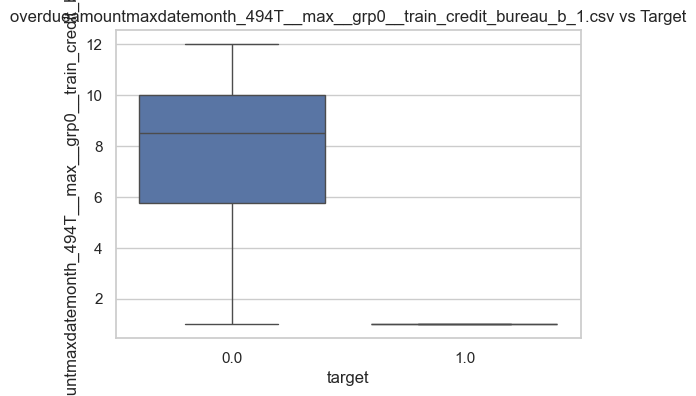

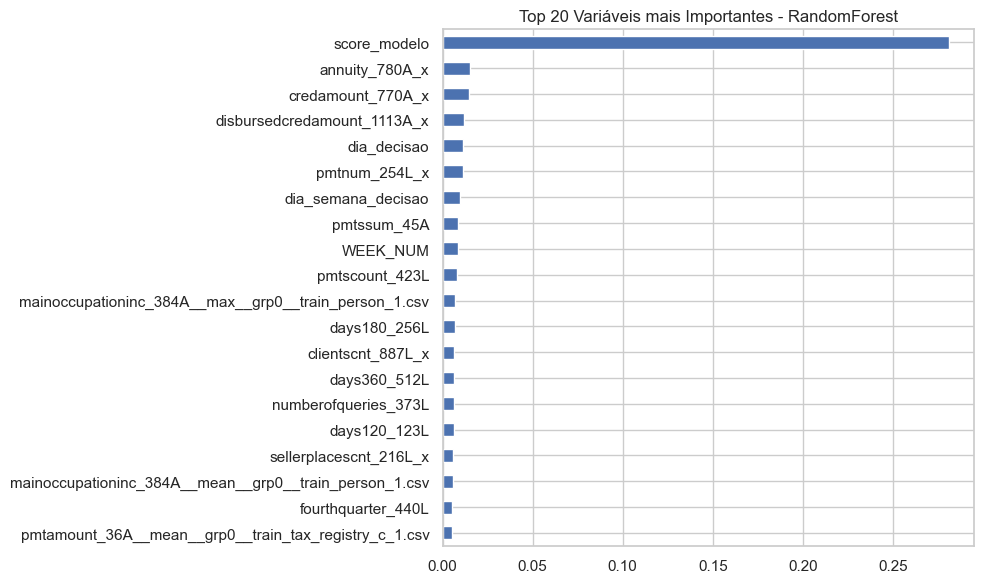

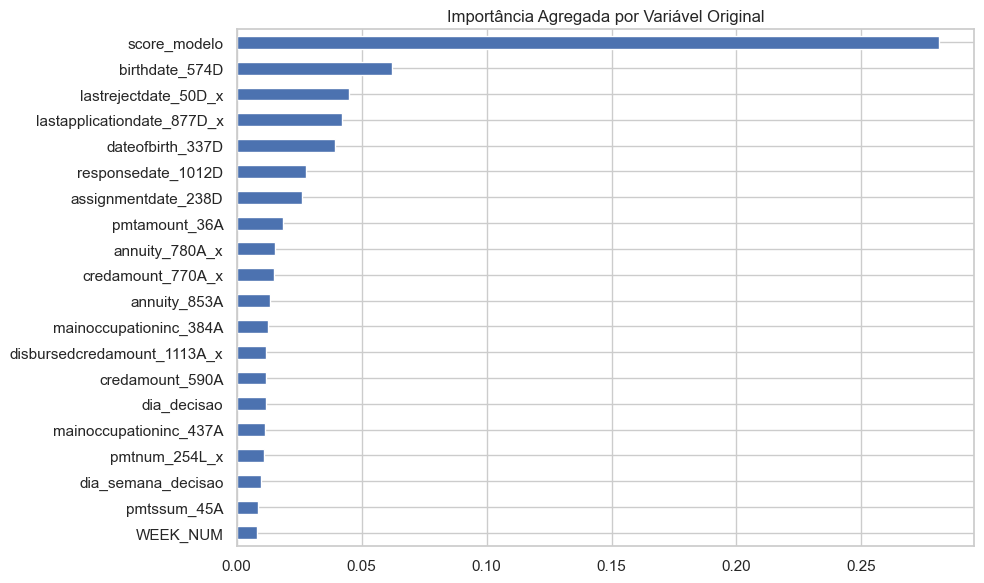

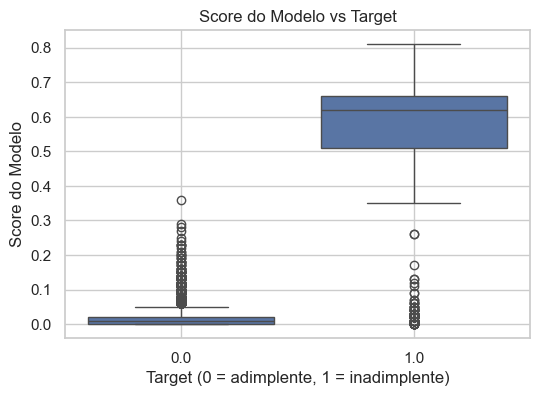

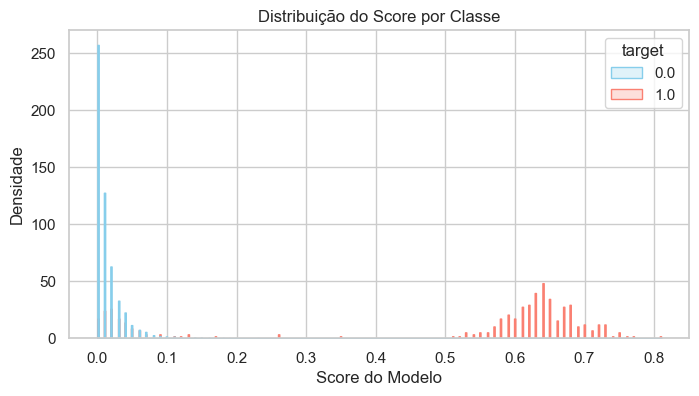

C:\Users\Usuario\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


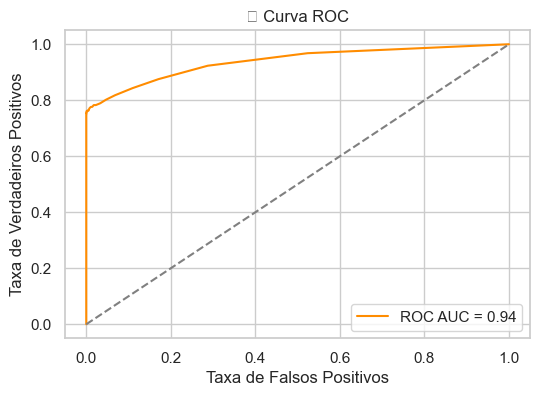


 EDA finalizada. Pronto para o próximo passo: Feature Engineering.


In [ ]:

# Notebook de Análise Exploratória - Home Credit

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Ajustes visuais
sns.set(style="whitegrid")

path = Config.BASE_FINAL
base = pd.read_csv(path)

print(f"Base carregada com shape: {base.shape}")

display(base.head())
base.info()
base.describe().T

#proporção da classe alvo
target_col = 'target'

plt.figure(figsize=(5, 3))
base[target_col].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição da Variável Alvo')
plt.xticks(rotation=0)
plt.show()

#Analise de nulos
nulos = base.isnull().mean().sort_values(ascending=False)
nulos[nulos > 0].plot(kind='bar', figsize=(14, 4), title='% de Valores Nulos por Coluna')
plt.show()

#Correlação com a variável alvo 
numeric_cols = base.select_dtypes(include=[np.number]).columns.tolist()

# Excluir colunas de id, semana, mes
excluir = ['case_id', 'week_num', 'month']
numeric_cols = [col for col in numeric_cols if col not in excluir]

corr = base[numeric_cols].corrwith(base[target_col]).abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
corr.head(20).plot(kind='barh')
plt.title('Top 20 Features mais correlacionadas com o Target')
plt.gca().invert_yaxis()
plt.show()

#Boxplots de algumas variáveis com target
top_vars = corr.head(6).index.tolist()

for col in top_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=base, x=target_col, y=col)
    plt.title(f'{col} vs Target')
    plt.show()

X = base.drop(columns=['target', 'case_id', 'week_num', 'month'], errors='ignore')
y = base[target_col]

X_dummies = pd.get_dummies(X, prefix_sep='__', drop_first=False)

X_dummies = X_dummies.dropna(axis=1, how='all')

imp = SimpleImputer(strategy="median")
X_imp_array = imp.fit_transform(X_dummies)
X_imp = pd.DataFrame(X_imp_array, columns=X_dummies.columns)

#Treina modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_imp, y)

importances = pd.Series(rf.feature_importances_, index=X_imp.columns)

#top 20 com nomes completos
top_features = importances.nlargest(20)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', title='Top 20 Variáveis mais Importantes - RandomForest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Agrupar por variável original
importances_grouped = importances.copy()
importances_grouped.index = importances_grouped.index.str.split('__').str[0]

grouped = importances_grouped.groupby(importances_grouped.index).sum()
top_grouped = grouped.nlargest(20)

plt.figure(figsize=(10, 6))
top_grouped.plot(kind='barh', title='Importância Agregada por Variável Original')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Análise do Score do Modelo vs Target

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

if 'score_modelo' in base.columns and 'target' in base.columns:

    # Score vs Target
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y='score_modelo', data=base)
    plt.title("Score do Modelo vs Target")
    plt.xlabel("Target (0 = adimplente, 1 = inadimplente)")
    plt.ylabel("Score do Modelo")
    plt.grid(True)
    plt.show()

    #Histograma: Distribuição do Score por Classe
    plt.figure(figsize=(8, 4))
    sns.histplot(data=base, x='score_modelo', hue='target', element='step',
                 stat='density', common_norm=False, palette=['skyblue', 'salmon'])
    plt.title("Distribuição do Score por Classe")
    plt.xlabel("Score do Modelo")
    plt.ylabel("Densidade")
    plt.grid(True)
    plt.show()

    #Curva ROC
    fpr, tpr, _ = roc_curve(base['target'], base['score_modelo'])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}", color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title("🔍 Curva ROC")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

else:
    print("A coluna 'score_modelo' ou 'target' não está presente no DataFrame.")



print("\n EDA finalizada. Pronto para o próximo passo: Feature Engineering.")


⬆️ Carregando base de dados de c:\Projetos\home_credit\data\processed\base_final.csv
✅ Base carregada: (10000, 1444)

🔍 Cardinalidade das features:
annuity_853A__mean__grp0__train_applprev_1_0.csv     3177
annuity_853A__max__grp0__train_applprev_1_0.csv      3177
annuity_780A_x                                       4882
pmtssum_45A                                          5198
case_id                                             10000
dtype: int64
❌ Removendo 977 colunas com um único valor: ['residualamount_856A__max__grp0__train_credit_bureau_a_1_3.csv', 'overdueamount_659A__max__grp0__train_credit_bureau_a_1_3.csv', 'overdueamountmax2_14A__mean__grp0__train_credit_bureau_a_1_3.csv', 'overdueamountmax2_14A__max__grp0__train_credit_bureau_a_1_3.csv', 'overdueamountmax2_398A__mean__grp0__train_credit_bureau_a_1_3.csv', 'overdueamountmax2_398A__max__grp0__train_credit_bureau_a_1_3.csv', 'overdueamountmax_155A__mean__grp0__train_credit_bureau_a_1_3.csv', 'overdueamountmax_155A__max__grp0__

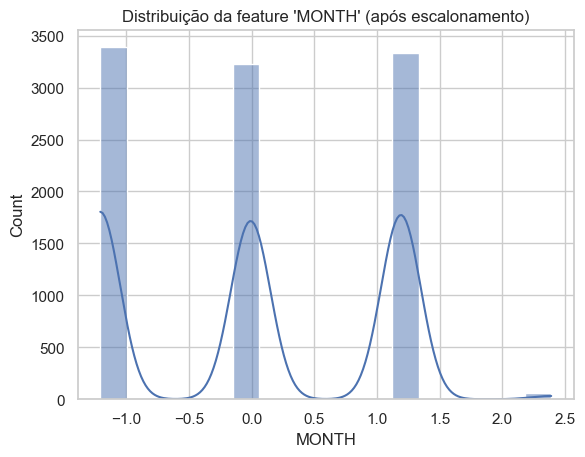

✅ Dados de treino e teste preparados e salvos.


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#base final
path = Config.BASE_FINAL
print(f"⬆Carregando base de dados de {path}")
df = pd.read_csv(path)
print(f"Base carregada: {df.shape}")

# variável alvo
TARGET = 'target'
assert TARGET in df.columns, "A coluna target precisa estar presente na base."

#colunas com alta cardinalidade ou baixa variância
nunicos = df.nunique().sort_values()
print("\nCardinalidade das features:")
print(nunicos.tail())

#eliminar colunas com apenas um valor
unival = nunicos[nunicos <= 1].index.tolist()
if unival:
    print(f"\u274c Removendo {len(unival)} colunas com um único valor: {unival}")
    df.drop(columns=unival, inplace=True)

#Separar variáveis numéricas e categóricas para tratamento
features = [col for col in df.columns if col not in ['case_id', TARGET]]

X_num = df[features].select_dtypes(include=[np.number])
X_cat = df[features].select_dtypes(include=['object', 'category'])

y = df[TARGET]

#valores faltantes
imputer_num = SimpleImputer(strategy='mean')
X_num_imputed = pd.DataFrame(imputer_num.fit_transform(X_num), columns=X_num.columns)

imputer_cat = SimpleImputer(strategy='constant', fill_value='missing')
X_cat_imputed = pd.DataFrame(imputer_cat.fit_transform(X_cat), columns=X_cat.columns)

#padronização somente nas numéricas
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num_imputed), columns=X_num.columns)

#Onehot encoding nas categóricas
X_cat_encoded = pd.get_dummies(X_cat_imputed, drop_first=True)

#Juntar num escalonadas e categóricas onehot
X_prepared = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

#treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_prepared, y, test_size=0.2, random_state=42, stratify=y
)

#Alinhar colunas do teste para ter as mesmas do treino
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("\nConjunto de treino e teste:")
print("Treino:", X_train.shape, y_train.shape)
print("Teste:", X_test.shape, y_test.shape)

#Visual da distribuição após escalonamento
if not X_num_scaled.empty:
    sns.histplot(X_num_scaled.iloc[:, 0], kde=True)
    plt.title(f"Distribuição da feature '{X_num_scaled.columns[0]}' (após escalonamento)")
    plt.show()

#pasta existe antes de salvar
os.makedirs(Config.PROCESSED_PATH, exist_ok=True)

#Salvar conjuntos preparados
X_train.to_csv(os.path.join(Config.PROCESSED_PATH, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(Config.PROCESSED_PATH, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(Config.PROCESSED_PATH, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(Config.PROCESSED_PATH, "y_test.csv"), index=False)

print("\u2705 Dados de treino e teste preparados e salvos.")


X_train: (8000, 7235), X_test: (2000, 7235)


c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera


Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1937
         1.0       0.00      0.00      0.00        63

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000


Confusion Matrix:
 [[1937    0]
 [  63    0]]

ROC AUC: 0.6066532274585966


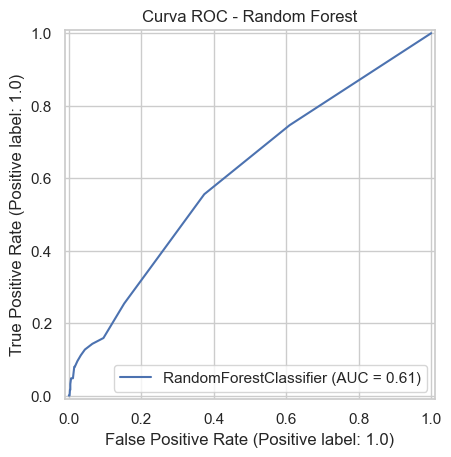

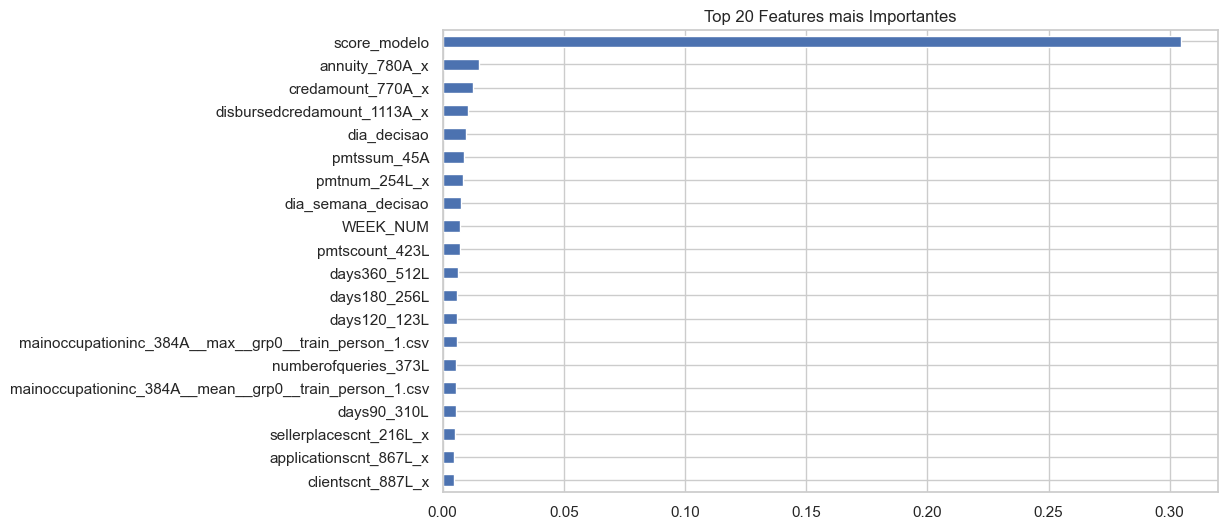


Melhores hiperparâmetros: {'max_depth': 20, 'n_estimators': 200}
Melhor ROC AUC (CV): 0.9809608236551574

Modelo salvo em data/processed/modelo_credito_rf.pkl


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#dados pré-processados
X_train = pd.read_csv("data/processed/X_train.csv")
X_test = pd.read_csv("data/processed/X_test.csv")
y_train = pd.read_csv("data/processed/y_train.csv").squeeze()
y_test = pd.read_csv("data/processed/y_test.csv").squeeze()

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

# Modelo baseline - RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# Previsão e Avaliação
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_prob))

# Curva ROC
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()

# Importância das features
importancias = pd.Series(clf.feature_importances_, index=X_train.columns)
importancias.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10, 6))
plt.title("Top 20 Features mais Importantes")
plt.gca().invert_yaxis()
plt.show()

# Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("\nMelhores hiperparâmetros:", grid.best_params_)
print("Melhor ROC AUC (CV):", grid.best_score_)

# Salva modelo
joblib.dump(grid.best_estimator_, "data/processed/modelo_credito_rf.pkl")
print("\nModelo salvo em data/processed/modelo_credito_rf.pkl")


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib
import pandas as pd

# Carregar base
df = pd.read_csv(Config.BASE_FINAL)
TARGET = 'target'

# Separar variáveis e target
X = df.drop(columns=[TARGET, 'case_id'])
y = df[TARGET]

# Identifica colunas numéricas e categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Definir pré-processamento para colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pré-processamento para colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

#pré-processador + modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# Treinar
pipeline.fit(X, y)

# Salvar
joblib.dump(pipeline, "data/processed/pipeline_credito_rf.pkl")
print("Pipeline salvo em data/processed/pipeline_credito_rf.pkl")


c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['credlmt_230A__mean__grp0__train_credit_bureau_a_1_1.csv'
 'credlmt_230A__max__grp0__train_credit_bureau_a_1_1.csv'
 'credlmt_935A__mean__grp0__train_credit_bureau_a_1_1.csv'
 'credlmt_935A__max__grp0__train_credit_bureau_a_1_1.csv'
 'debtoutstand_525A__mean__grp0__train_credit_bureau_a_1_1.csv'
 'debtoutstand_525A__max__grp0__train_credit_bureau_a_1_1.csv'
 'debtoverdue_47A__mean__grp0__train_credit_bureau_a_1_1.csv'
 'debtoverdue_47A__max__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmax_139P__mean__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmax_139P__max__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmax_757P__mean__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmax_757P__max__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmaxdatemonth_442T__mean__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmaxdatemonth_442T__max__grp0__train_credit_bureau_

Pipeline salvo em data/processed/pipeline_credito_rf.pkl


In [ ]:
import pandas as pd
import joblib

# Carregar pipeline salvo
pipeline = joblib.load("data/processed/pipeline_credito_rf.pkl")

# Carregar dados de teste sem pré-processamento
df_test = pd.read_csv("data/processed/base_final.csv")

# Remover colunas que o pipeline não usa
X_test = df_test.drop(columns=['case_id', 'target'], errors='ignore')

# Fazer previsão direto
scores = pipeline.predict_proba(X_test)[:, 1]

# Criar arquivo submission
submission = pd.DataFrame({
    'case_id': df_test['case_id'],
    'score': scores.round(6)
})
submission.to_csv("submission_final.csv", index=False)
print("submission_final.csv gerado com sucesso.")


c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['credlmt_230A__mean__grp0__train_credit_bureau_a_1_1.csv'
 'credlmt_230A__max__grp0__train_credit_bureau_a_1_1.csv'
 'credlmt_935A__mean__grp0__train_credit_bureau_a_1_1.csv'
 'credlmt_935A__max__grp0__train_credit_bureau_a_1_1.csv'
 'debtoutstand_525A__mean__grp0__train_credit_bureau_a_1_1.csv'
 'debtoutstand_525A__max__grp0__train_credit_bureau_a_1_1.csv'
 'debtoverdue_47A__mean__grp0__train_credit_bureau_a_1_1.csv'
 'debtoverdue_47A__max__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmax_139P__mean__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmax_139P__max__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmax_757P__mean__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmax_757P__max__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmaxdatemonth_442T__mean__grp0__train_credit_bureau_a_1_1.csv'
 'dpdmaxdatemonth_442T__max__grp0__train_credit_bureau_

✅ submission_final.csv gerado com sucesso.
